# **Final Year Project 2 (Experiment Testing 2)**

In [2]:
#pip install xgboost

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np

#Data preprocessing and Modeling
from sklearn.model_selection import train_test_split

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc

# Feature scaling (for KNN, SVM, MLP)
from sklearn.preprocessing import StandardScaler

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Read the dataset(s)

In [2]:
#Load dataset
data1 = pd.read_csv("C:/Users/yonge/OneDrive/Desktop/1221304737_ANG YONG EN_FYP1/pima_indian_diabetes_dataset.csv")
data2 = pd.read_csv("C:/Users/yonge/OneDrive/Desktop/1221304737_ANG YONG EN_FYP1/sylhet_diabetes_hospital_dataset.csv", header=None)
data3 = pd.read_csv("C:/Users/yonge/OneDrive/Desktop/1221304737_ANG YONG EN_FYP1/Multiclass Diabetes Dataset.csv")

In [3]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [5]:
data2.head()

,0
0,age;gender;polyuria;polydipsia;sudden_weight_l...
1,40;Male;0;1;0;1;0;0;0;1;0;1;0;1;1;1;1
2,58;Male;0;0;0;1;0;0;1;0;0;0;1;0;1;0;1
3,41;Male;1;0;0;1;1;0;0;1;0;1;0;1;1;0;1
4,45;Male;0;0;1;1;1;1;0;1;0;1;0;0;0;0;1


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       521 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB


In [7]:
data3.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


In [8]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [9]:
#Check for the missing values in the datasets
print("Missing values in data1 (Pima):")
print(data1.isnull().sum())

Missing values in data1 (Pima):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
print("\nMissing values in data2 (Sylhet):")
print(data2.isnull().sum())


Missing values in data2 (Sylhet):
0    0
dtype: int64


In [11]:
print("\nMissing values in data3 (Multiclass):")
print(data3.isnull().sum())


Missing values in data3 (Multiclass):
Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
Class     0
dtype: int64


In [12]:
#Data Preprocessing 
## Split the ssingle column by ;
data2_split = data2[0].str.split(';', expand=True)

# Step 3: Convert all columns to numeric (important for ML)
data2_split = data2_split.apply(pd.to_numeric, errors='coerce')

In [13]:
#Split the features and target
X1 = data1.drop(columns=['Outcome'], axis=1)
y1 = data1['Outcome']

X2 = data2_split.iloc[:, :-1]  # All columns except the last one
y2 = data2_split.iloc[:, -1]   # Last column = class (0 = non-diabetic, 1 = diabetic)

X3 = data3.drop('Class', axis=1)
y3 = data3['Class']

In [14]:
print(data1['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [15]:
print(data3['Class'].value_counts())

Class
2    128
0     96
1     40
Name: count, dtype: int64


In [16]:
#Optional - handle missing values if any
X2 = X2.fillna(0)  # or use X.fillna(X.mean())
y2 = y2.fillna(0)

In [17]:
#Train test split
#TTS for Dataset 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
#TTS for Dataset 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
#TTS for Dataset 3
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)

In [18]:
#Feature Scaling for KNN, SVM, MLP
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

scaler3 = StandardScaler()
X3_train_scaled = scaler3.fit_transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)


--- Decision Tree (Pima) ---
Accuracy: 0.7272727272727273
Precision: 0.7250788427259015
Recall: 0.7272727272727273
F1-score: 0.7260499634869146
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.62      0.59      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
 [[80 20]
 [22 32]]
AUC: 0.7713888888888889


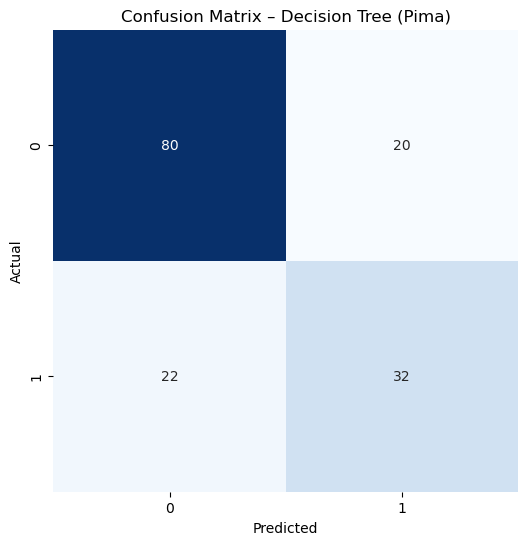

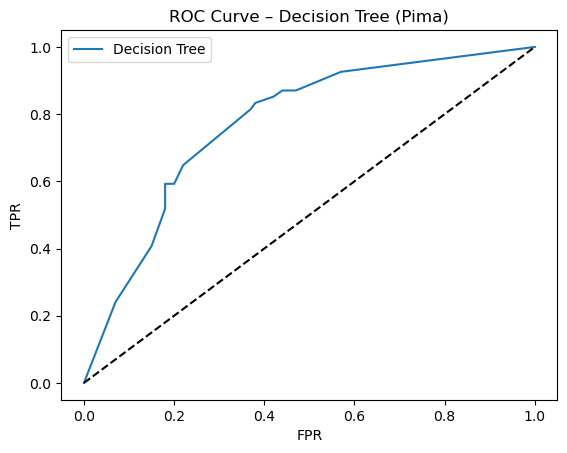


--- Random Forest (Pima) ---
Accuracy: 0.7532467532467533
Precision: 0.7580515748619197
Recall: 0.7532467532467533
F1-score: 0.7551351709514975
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       100
           1       0.64      0.69      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.76       154

Confusion Matrix:
 [[79 21]
 [17 37]]
AUC: 0.8244444444444444


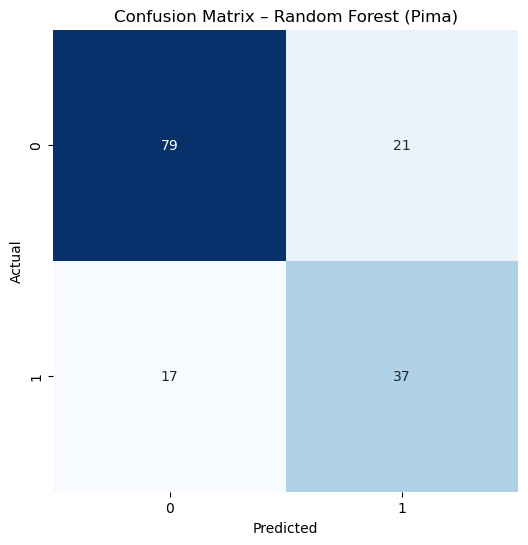

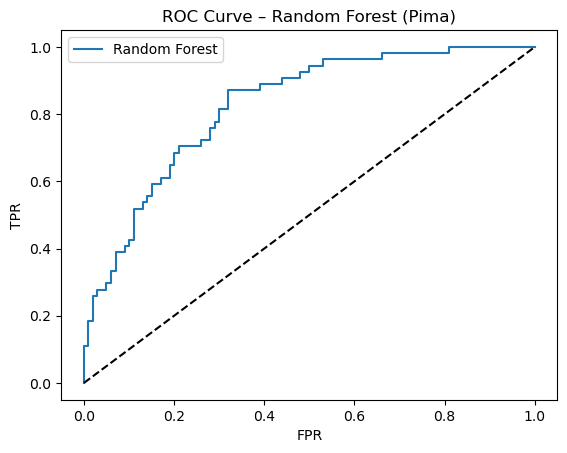


--- Logistic Regression (Pima) ---
Accuracy: 0.7337662337662337
Precision: 0.7466818895390324
Recall: 0.7337662337662337
F1-score: 0.737733470717764
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       100
           1       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

Confusion Matrix:
 [[75 25]
 [16 38]]
AUC: 0.8122222222222223


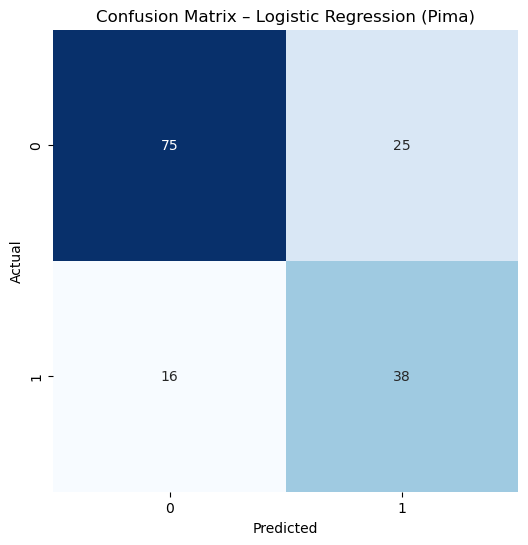

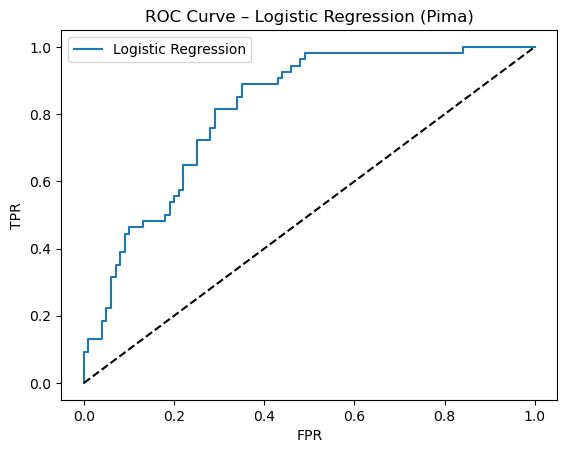


--- SVM (Pima) ---
Accuracy: 0.7597402597402597
Precision: 0.7756804992760048
Recall: 0.7597402597402597
F1-score: 0.7638530159538564
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       100
           1       0.63      0.76      0.69        54

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.78      0.76      0.76       154

Confusion Matrix:
 [[76 24]
 [13 41]]
AUC: 0.8131481481481481


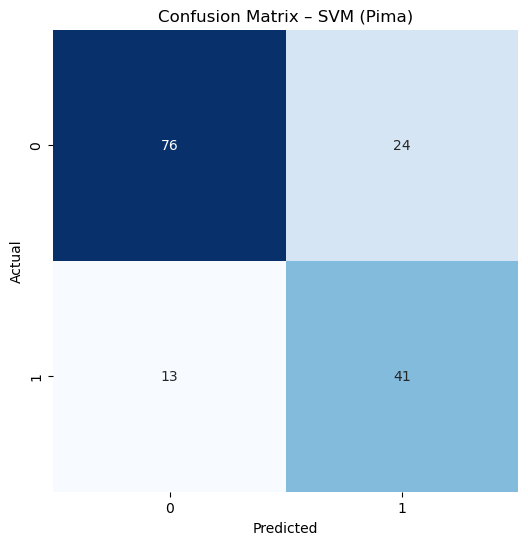

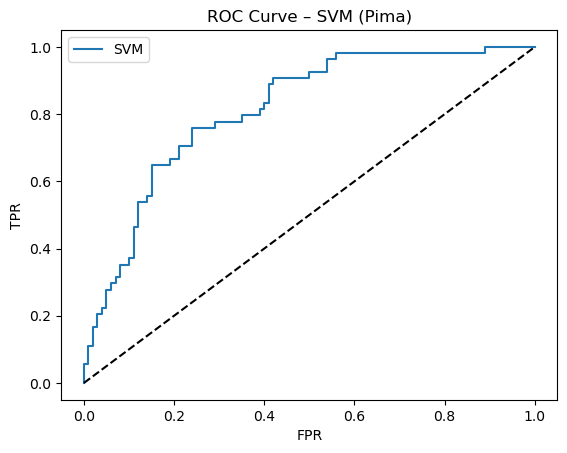


--- KNN (Pima) ---
Accuracy: 0.7272727272727273
Precision: 0.7231468531468531
Recall: 0.7272727272727273
F1-score: 0.7247017688194158
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79       100
           1       0.62      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154

Confusion Matrix:
 [[81 19]
 [23 31]]
AUC: 0.7930555555555556


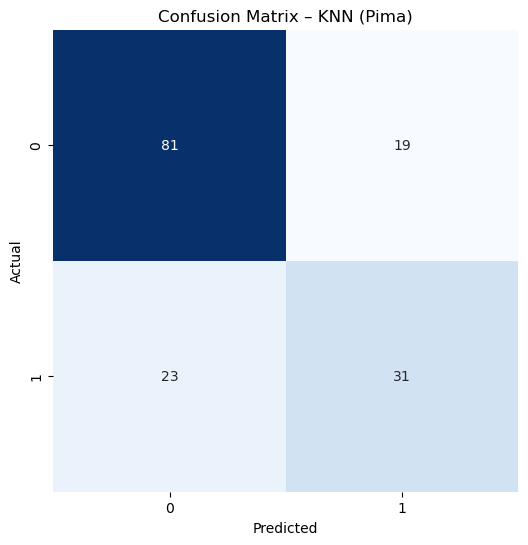

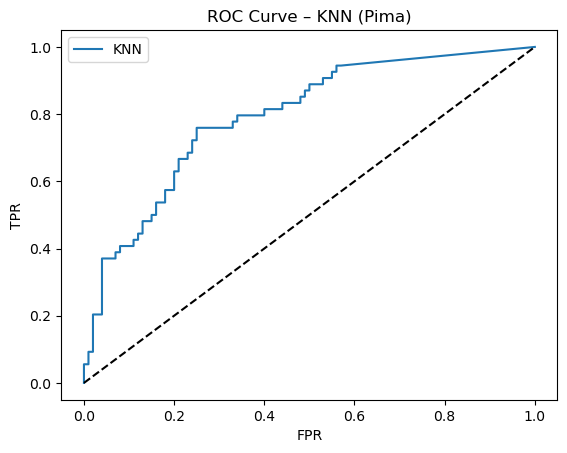


--- MLP (Pima) ---
Accuracy: 0.7142857142857143
Precision: 0.7196223316912971
Recall: 0.7142857142857143
F1-score: 0.7164723032069972
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       100
           1       0.59      0.63      0.61        54

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154

Confusion Matrix:
 [[76 24]
 [20 34]]
AUC: 0.8025925925925925


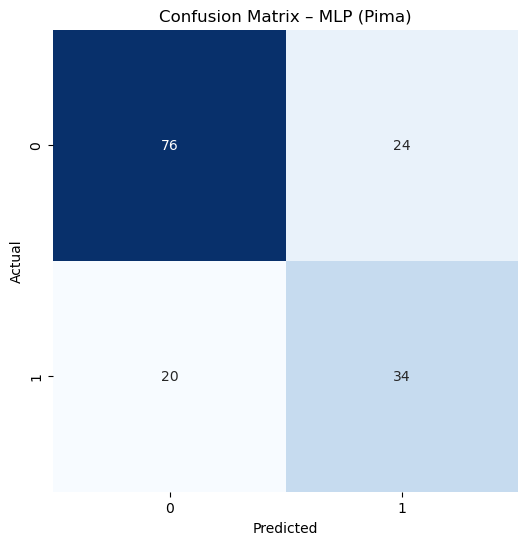

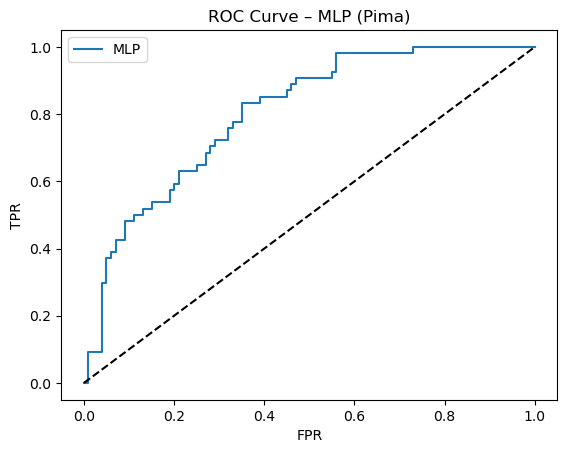


--- XGBoost (Pima) ---
Accuracy: 0.7272727272727273
Precision: 0.7250788427259015
Recall: 0.7272727272727273
F1-score: 0.7260499634869146
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.62      0.59      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
 [[80 20]
 [22 32]]
AUC: 0.8138888888888889


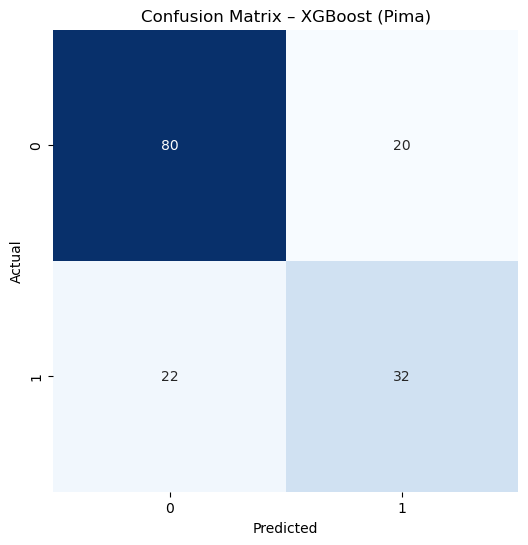

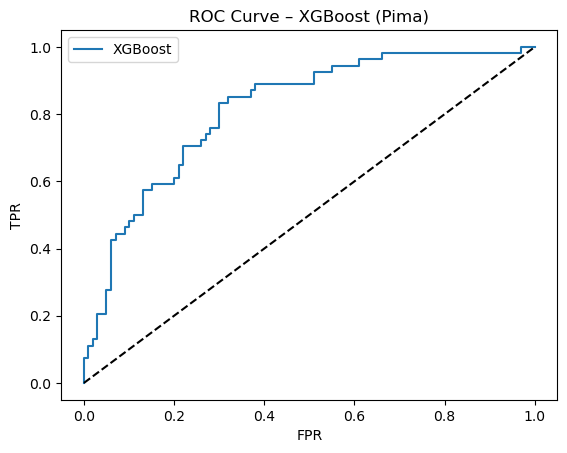


--- AdaBoost (Pima) ---
Accuracy: 0.7337662337662337
Precision: 0.730669672988348
Recall: 0.7337662337662337
F1-score: 0.7319301388266906
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.63      0.59      0.61        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
 [[81 19]
 [22 32]]
AUC: 0.7767592592592593


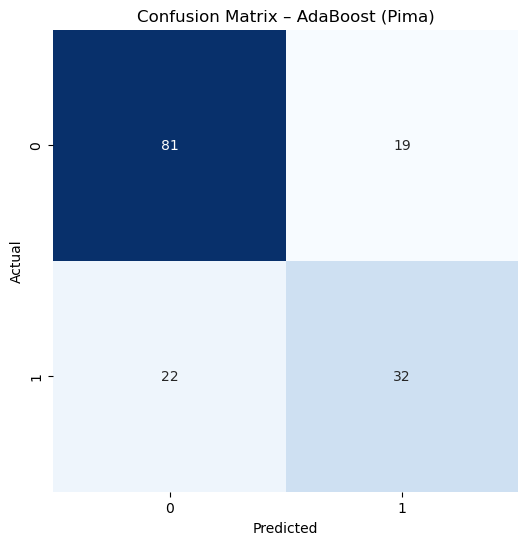

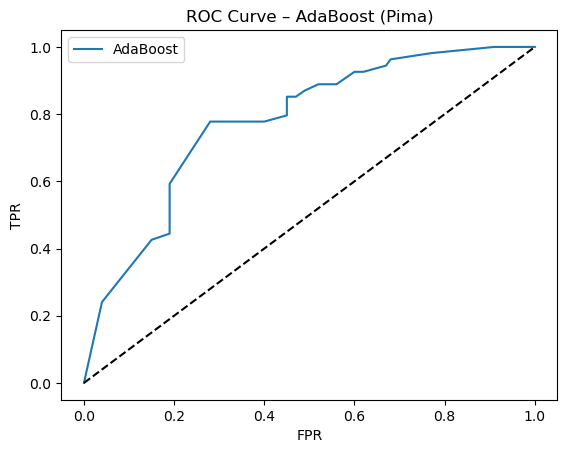

In [19]:
# ==============================
# PART 1: Pima Indian Diabetes Dataset
# ==============================


# Define models 
models_data1 = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=3, min_samples_leaf=2, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=4, min_samples_leaf=2, class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(C=1.5, penalty='l2', solver='lbfgs', max_iter=1500, class_weight='balanced', random_state=42),
    "SVM": SVC(kernel='rbf', C=2.0, gamma='scale', probability=True, class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance', metric='minkowski'),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0005, max_iter=1800, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=350, max_depth=4, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, eval_metric='logloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2, class_weight='balanced'), n_estimators=200, learning_rate=0.2, random_state=42)
}

scaled_models = ["Logistic Regression", "SVM", "KNN", "MLP"]

# Train and evaluate
for name, model in models_data1.items():
    print(f"\n--- {name} (Pima) ---")
    
    if name in scaled_models:
        model.fit(X1_train_scaled, y1_train)
        y_pred = model.predict(X1_test_scaled)
        y_prob = model.predict_proba(X1_test_scaled)[:, 1]
    else:
        model.fit(X1_train, y1_train)
        y_pred = model.predict(X1_test)
        y_prob = model.predict_proba(X1_test)[:, 1]

    print("Accuracy:", accuracy_score(y1_test, y_pred))
    print("Precision:", precision_score(y1_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y1_test, y_pred, average='weighted'))
    print("F1-score:", f1_score(y1_test, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y1_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y1_test, y_pred))
    print("AUC:", roc_auc_score(y1_test, y_prob))

     # Confusion matrix heatmap
    cm = confusion_matrix(y1_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix – {name} (Pima)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y1_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name}")
    plt.plot([0,1], [0,1], 'k--')
    plt.title(f"ROC Curve – {name} (Pima)")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.show()



--- Decision Tree (Sylhet) ---
Accuracy: 0.9428571428571428
Precision: 0.953125
Recall: 0.953125
F1-score: 0.953125
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        41
         1.0       0.95      0.95      0.95        64

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105

Confusion Matrix:
 [[38  3]
 [ 3 61]]
AUC: 0.9536966463414634


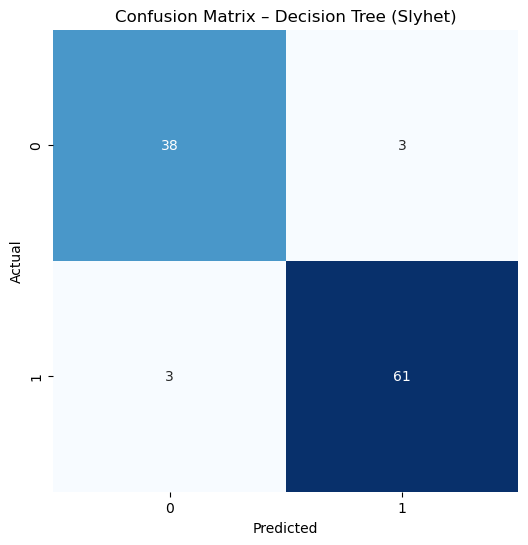

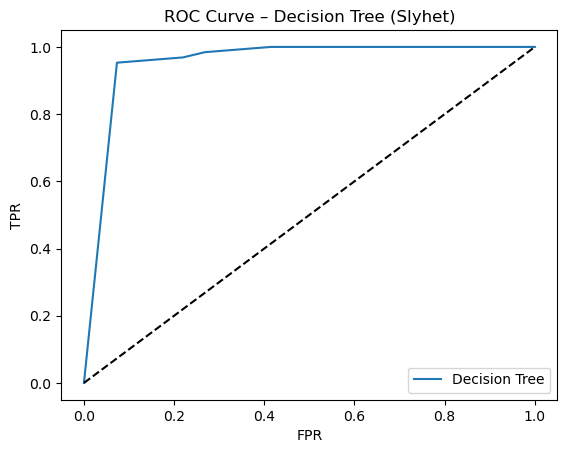


--- Random Forest (Sylhet) ---
Accuracy: 0.9809523809523809
Precision: 0.9696969696969697
Recall: 1.0
F1-score: 0.9846153846153847
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        41
         1.0       0.97      1.00      0.98        64

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

Confusion Matrix:
 [[39  2]
 [ 0 64]]
AUC: 0.9965701219512195


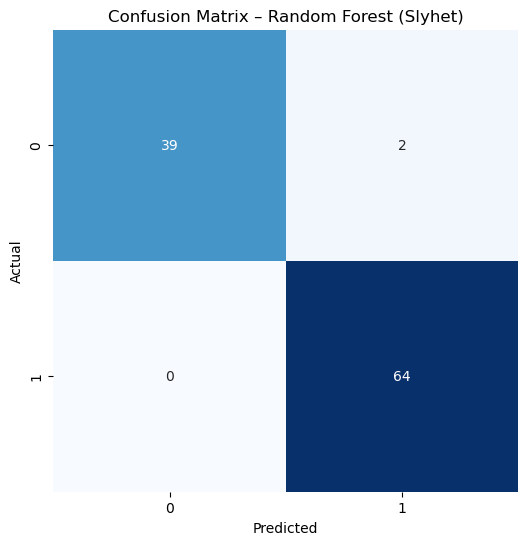

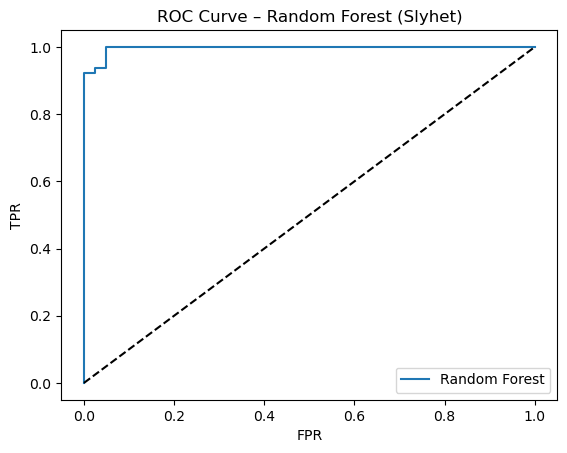


--- Logistic Regression (Sylhet) ---
Accuracy: 0.9142857142857143
Precision: 0.9508196721311475
Recall: 0.90625
F1-score: 0.928
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.93      0.89        41
         1.0       0.95      0.91      0.93        64

    accuracy                           0.91       105
   macro avg       0.91      0.92      0.91       105
weighted avg       0.92      0.91      0.91       105

Confusion Matrix:
 [[38  3]
 [ 6 58]]
AUC: 0.9782774390243902


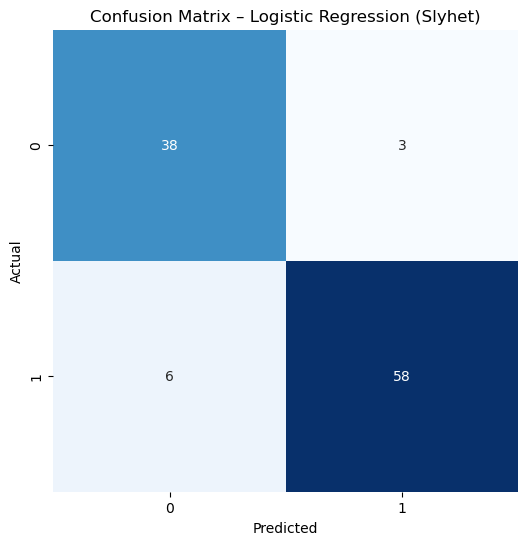

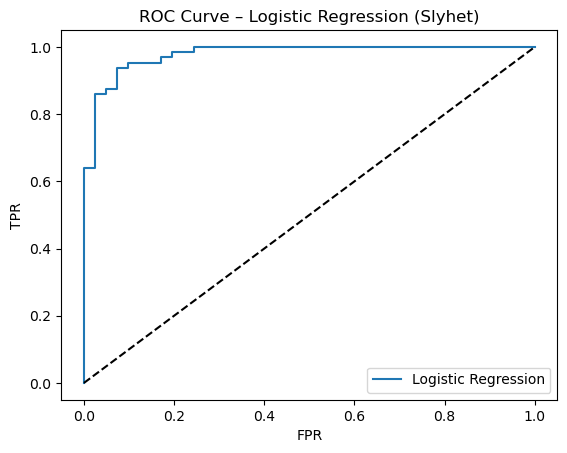


--- SVM (Sylhet) ---
Accuracy: 0.9809523809523809
Precision: 0.984375
Recall: 0.984375
F1-score: 0.984375
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        41
         1.0       0.98      0.98      0.98        64

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

Confusion Matrix:
 [[40  1]
 [ 1 63]]
AUC: 0.9992378048780488


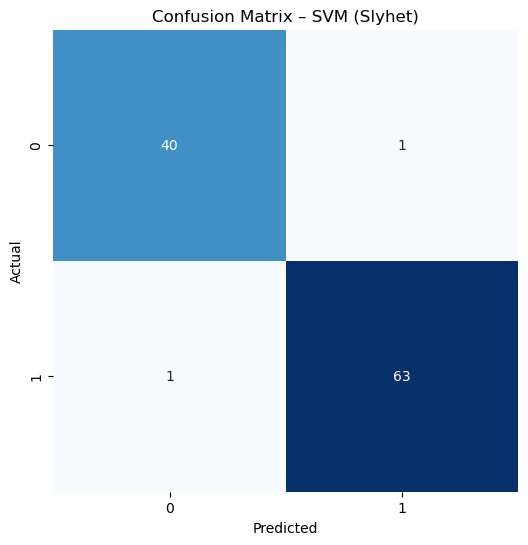

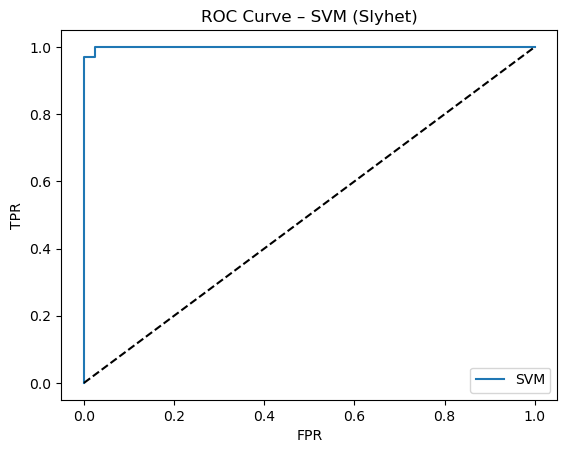


--- KNN (Sylhet) ---
Accuracy: 0.9428571428571428
Precision: 1.0
Recall: 0.90625
F1-score: 0.9508196721311475
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        41
         1.0       1.00      0.91      0.95        64

    accuracy                           0.94       105
   macro avg       0.94      0.95      0.94       105
weighted avg       0.95      0.94      0.94       105

Confusion Matrix:
 [[41  0]
 [ 6 58]]
AUC: 0.9904725609756099


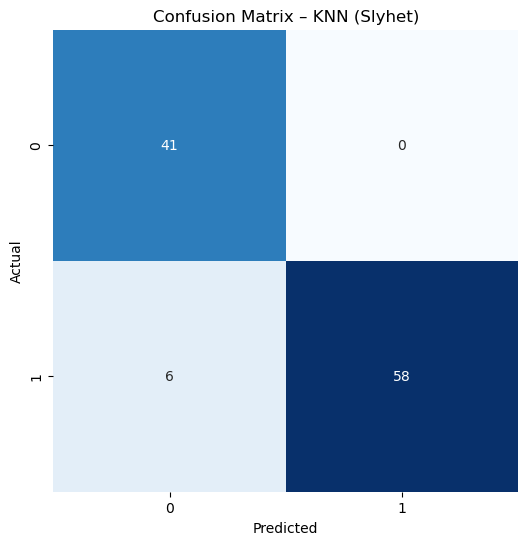

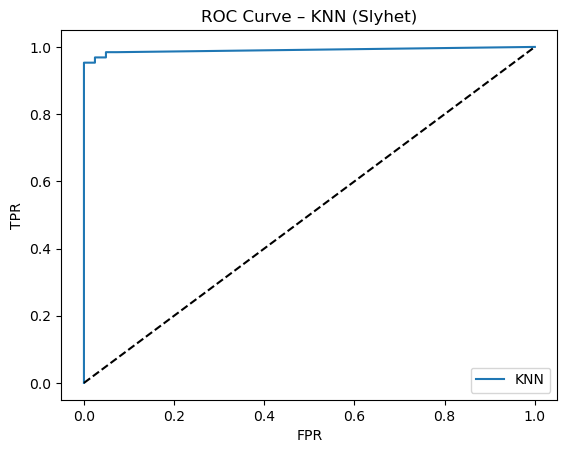


--- MLP (Sylhet) ---
Accuracy: 0.9714285714285714
Precision: 0.9692307692307692
Recall: 0.984375
F1-score: 0.9767441860465116
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        41
         1.0       0.97      0.98      0.98        64

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

Confusion Matrix:
 [[39  2]
 [ 1 63]]
AUC: 0.9942835365853658


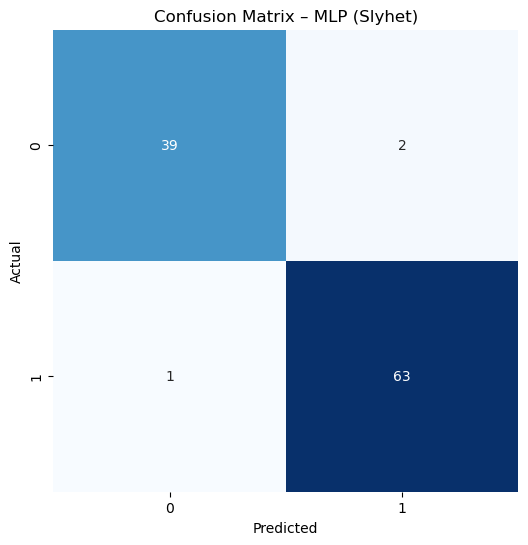

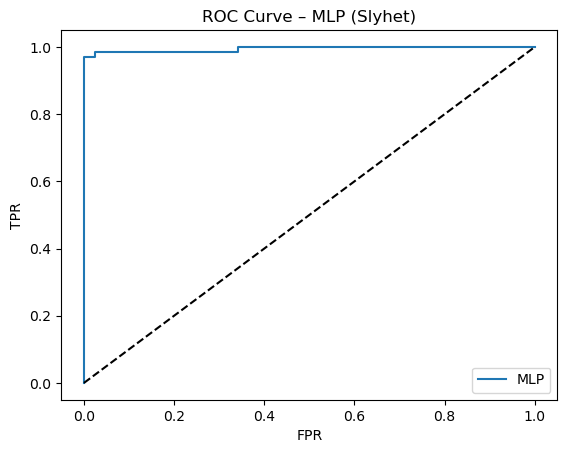


--- XGBoost (Sylhet) ---
Accuracy: 0.9714285714285714
Precision: 0.9692307692307692
Recall: 0.984375
F1-score: 0.9767441860465116
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        41
         1.0       0.97      0.98      0.98        64

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

Confusion Matrix:
 [[39  2]
 [ 1 63]]
AUC: 0.9958079268292683


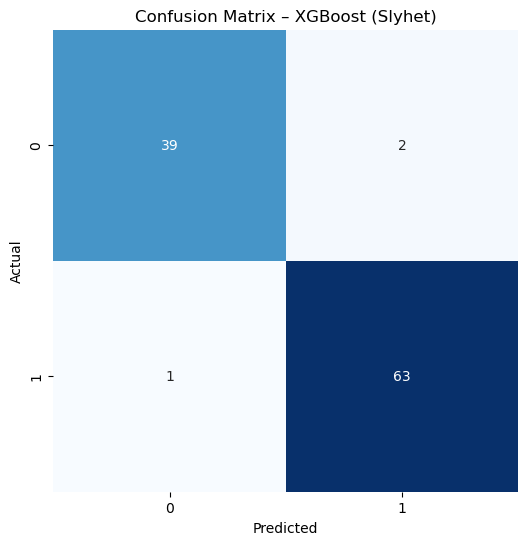

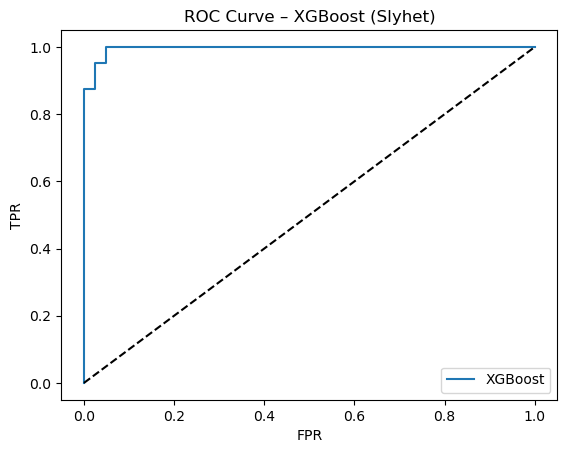


--- AdaBoost (Sylhet) ---
Accuracy: 0.9238095238095239
Precision: 0.9242424242424242
Recall: 0.953125
F1-score: 0.9384615384615385
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        41
         1.0       0.92      0.95      0.94        64

    accuracy                           0.92       105
   macro avg       0.92      0.92      0.92       105
weighted avg       0.92      0.92      0.92       105

Confusion Matrix:
 [[36  5]
 [ 3 61]]
AUC: 0.9767530487804879


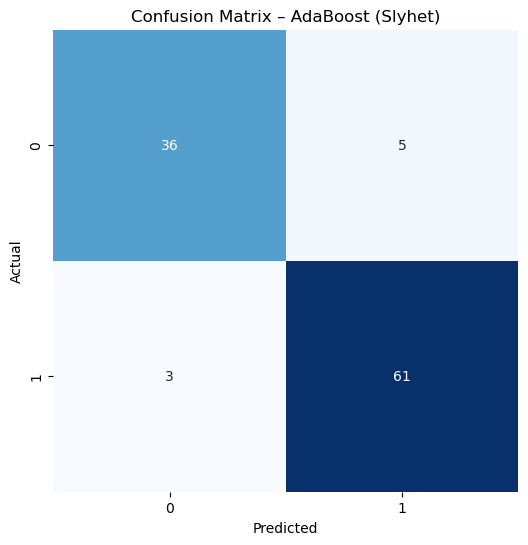

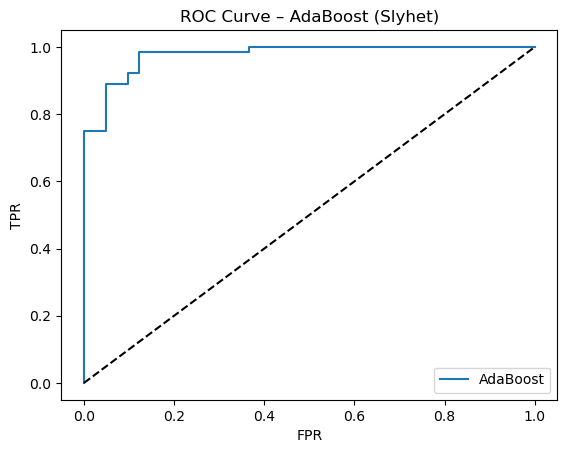

In [25]:
# ==============================
# PART 2: Sylhet Diabetes Hospital Dataset
# ==============================


# Define models (Sylhet-optimized)
models_data2 = {
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=5, min_samples_leaf=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_split=5, min_samples_leaf=3, random_state=42),
    "Logistic Regression": LogisticRegression(C=0.5, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42),
    "SVM": SVC(kernel='rbf', C=2.0, gamma='scale', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance', metric='minkowski'),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam', alpha=0.0005, max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, eval_metric='logloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=150, learning_rate=0.05, random_state=42)

}


# Train and evaluate
for name, model in models_data2.items():
    print(f"\n--- {name} (Sylhet) ---")
    
    if name in scaled_models:
        model.fit(X2_train_scaled, y2_train)
        y_pred = model.predict(X2_test_scaled)
        y_prob = model.predict_proba(X2_test_scaled)[:, 1]
    else:
        model.fit(X2_train, y2_train)
        y_pred = model.predict(X2_test)
        y_prob = model.predict_proba(X2_test)[:, 1]

    print("Accuracy:", accuracy_score(y2_test, y_pred))
    print("Precision:", precision_score(y2_test, y_pred))
    print("Recall:", recall_score(y2_test, y_pred))
    print("F1-score:", f1_score(y2_test, y_pred))
    print("Classification Report:\n", classification_report(y2_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y2_test, y_pred))
    print("AUC:", roc_auc_score(y2_test, y_prob))

     # Confusion matrix heatmap
    cm = confusion_matrix(y2_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix – {name} (Slyhet)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y2_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name}")
    plt.plot([0,1], [0,1], 'k--')
    plt.title(f"ROC Curve – {name} (Slyhet)")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.show()



--- Decision Tree (Multiclass) ---
Accuracy: 0.9811320754716981
Precision: 0.9820754716981132
Recall: 0.9811320754716981
F1-score: 0.9811889922877712
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00         8
           2       1.00      0.96      0.98        26

    accuracy                           0.98        53
   macro avg       0.98      0.99      0.98        53
weighted avg       0.98      0.98      0.98        53

Confusion Matrix:
 [[19  0  0]
 [ 0  8  0]
 [ 1  0 25]]
AUC: 0.9993731245118592


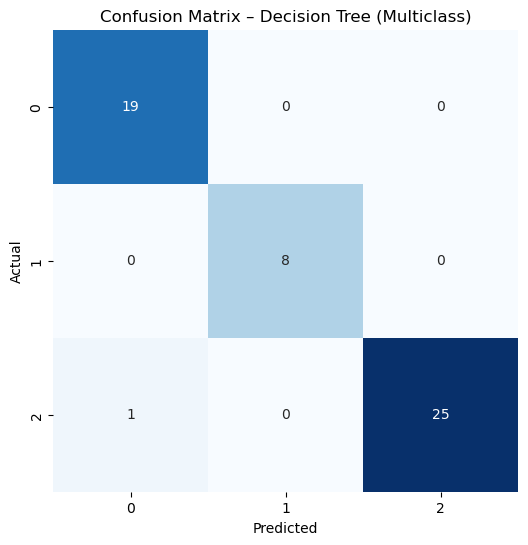

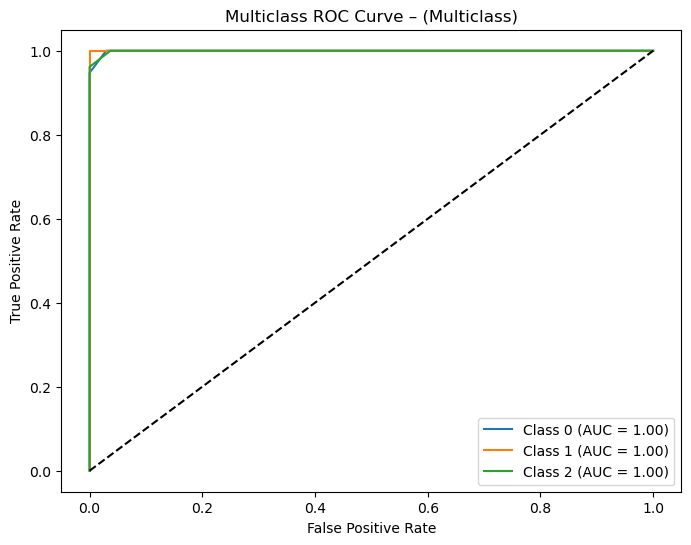


--- Random Forest (Multiclass) ---
Accuracy: 0.9811320754716981
Precision: 0.9820754716981132
Recall: 0.9811320754716981
F1-score: 0.9811889922877712
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00         8
           2       1.00      0.96      0.98        26

    accuracy                           0.98        53
   macro avg       0.98      0.99      0.98        53
weighted avg       0.98      0.98      0.98        53

Confusion Matrix:
 [[19  0  0]
 [ 0  8  0]
 [ 1  0 25]]
AUC: 0.9986023759608665


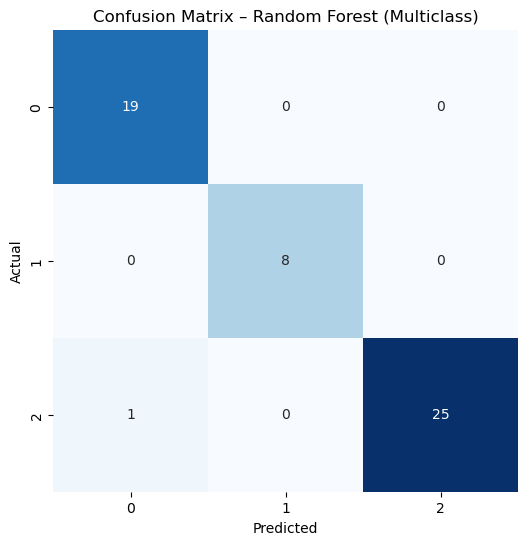

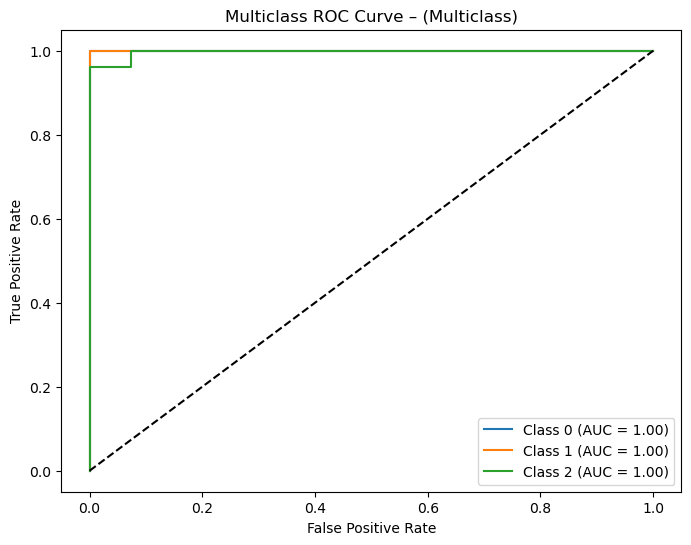


--- Logistic Regression (Multiclass) ---
Accuracy: 0.8867924528301887
Precision: 0.8845462713387241
Recall: 0.8867924528301887
F1-score: 0.8827992412898072
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.83      0.62      0.71         8
           2       0.89      0.96      0.93        26

    accuracy                           0.89        53
   macro avg       0.87      0.83      0.84        53
weighted avg       0.88      0.89      0.88        53

Confusion Matrix:
 [[17  1  1]
 [ 1  5  2]
 [ 1  0 25]]
AUC: 0.9835450322686726


C:\Users\yonge\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


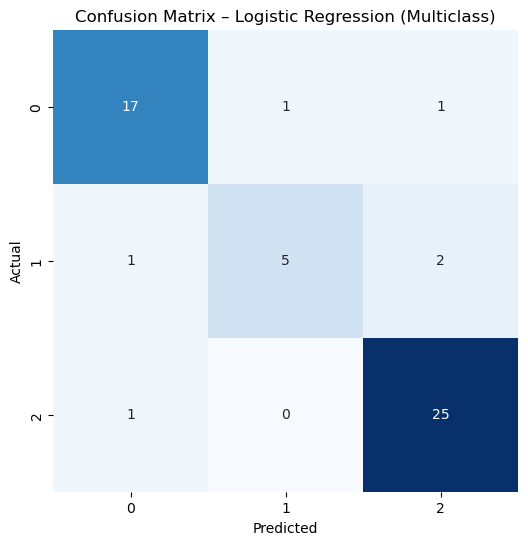

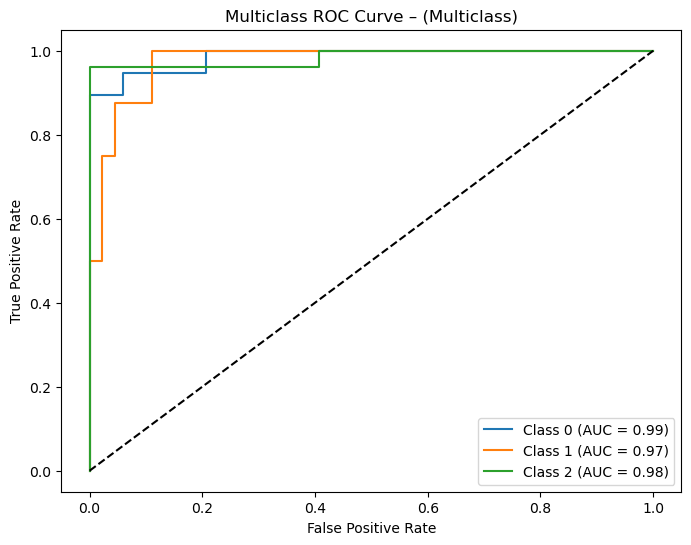


--- SVM (Multiclass) ---
Accuracy: 0.9245283018867925
Precision: 0.9248777078965759
Recall: 0.9245283018867925
F1-score: 0.9242973838915456
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.88      0.88      0.88         8
           2       0.93      0.96      0.94        26

    accuracy                           0.92        53
   macro avg       0.92      0.91      0.91        53
weighted avg       0.92      0.92      0.92        53

Confusion Matrix:
 [[17  0  2]
 [ 1  7  0]
 [ 0  1 25]]
AUC: 0.9919143338677189


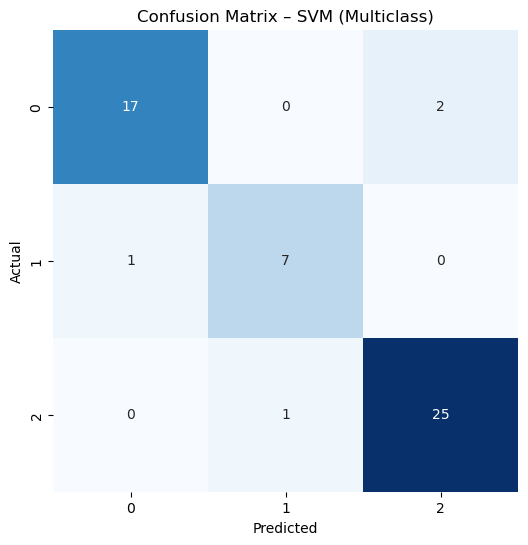

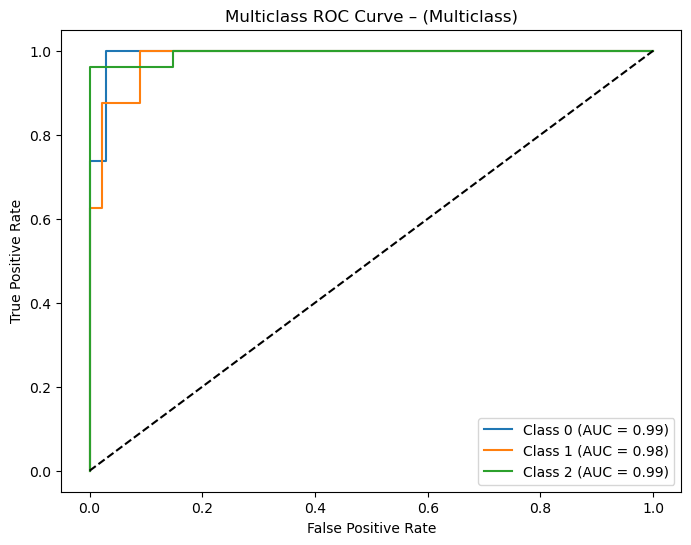


--- KNN (Multiclass) ---
Accuracy: 0.9056603773584906
Precision: 0.9047619047619047
Recall: 0.9056603773584906
F1-score: 0.902156334231806
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.83      0.62      0.71         8
           2       0.96      0.96      0.96        26

    accuracy                           0.91        53
   macro avg       0.88      0.84      0.86        53
weighted avg       0.90      0.91      0.90        53

Confusion Matrix:
 [[18  0  1]
 [ 3  5  0]
 [ 0  1 25]]
AUC: 0.9892752908291199


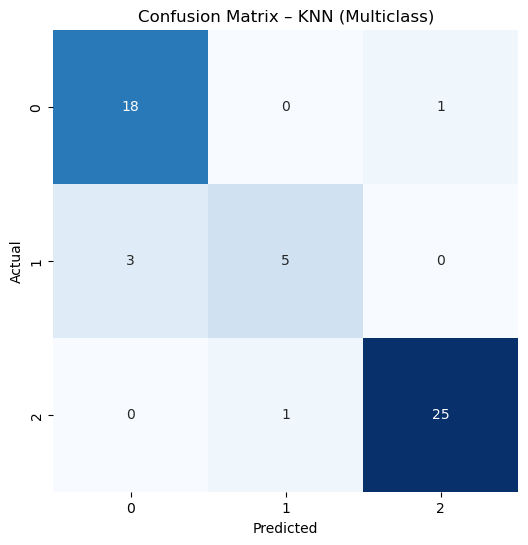

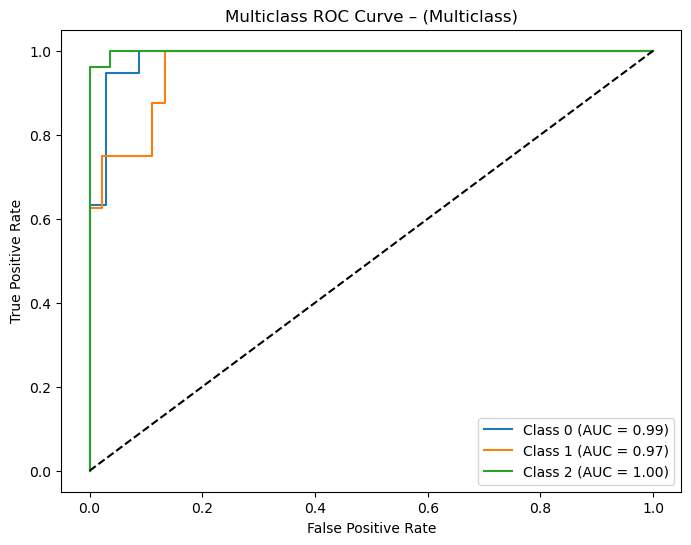


--- MLP (Multiclass) ---
Accuracy: 0.9245283018867925
Precision: 0.9334730957372466
Recall: 0.9245283018867925
F1-score: 0.9247328597987194
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.80      1.00      0.89         8
           2       0.93      0.96      0.94        26

    accuracy                           0.92        53
   macro avg       0.91      0.93      0.92        53
weighted avg       0.93      0.92      0.92        53

Confusion Matrix:
 [[16  1  2]
 [ 0  8  0]
 [ 0  1 25]]
AUC: 0.9931763061618777


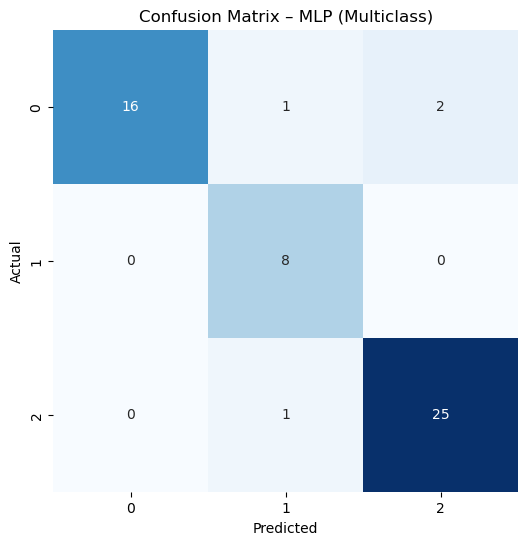

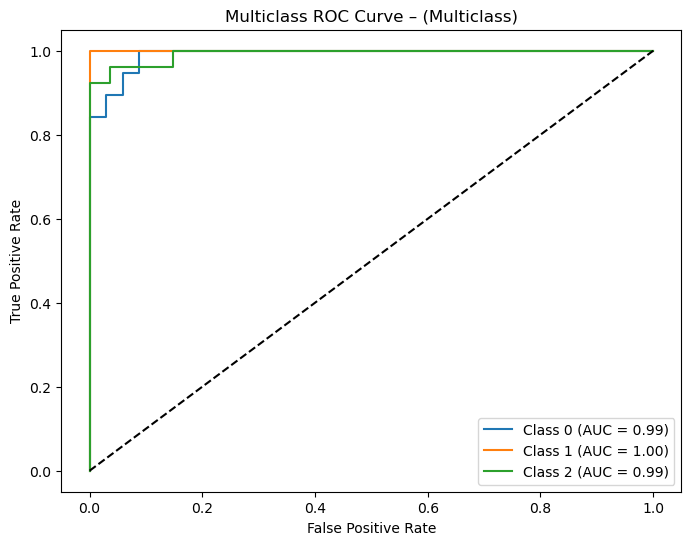


--- XGBoost (Multiclass) ---
Accuracy: 0.9811320754716981
Precision: 0.9820754716981132
Recall: 0.9811320754716981
F1-score: 0.9811889922877712
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00         8
           2       1.00      0.96      0.98        26

    accuracy                           0.98        53
   macro avg       0.98      0.99      0.98        53
weighted avg       0.98      0.98      0.98        53

Confusion Matrix:
 [[19  0  0]
 [ 0  8  0]
 [ 1  0 25]]
AUC: 0.9986023759608665


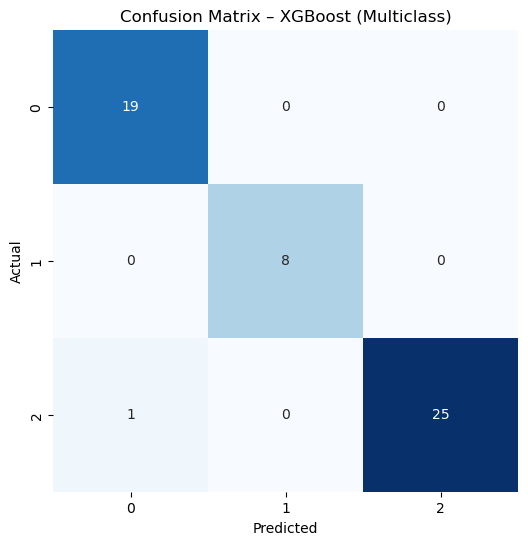

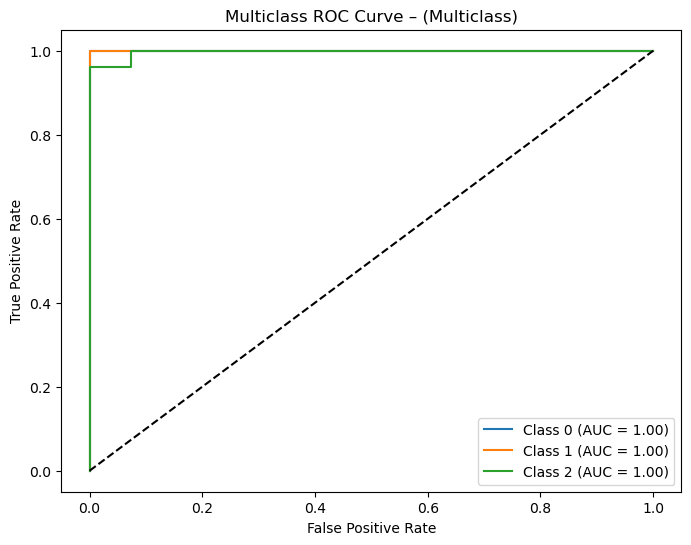


--- AdaBoost (Multiclass) ---
Accuracy: 0.9433962264150944
Precision: 0.9518867924528303
Recall: 0.9433962264150944
F1-score: 0.9440017903629763
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.80      1.00      0.89         8
           2       1.00      0.88      0.94        26

    accuracy                           0.94        53
   macro avg       0.92      0.96      0.93        53
weighted avg       0.95      0.94      0.94        53

Confusion Matrix:
 [[19  0  0]
 [ 0  8  0]
 [ 1  2 23]]
AUC: 0.9802626711061783


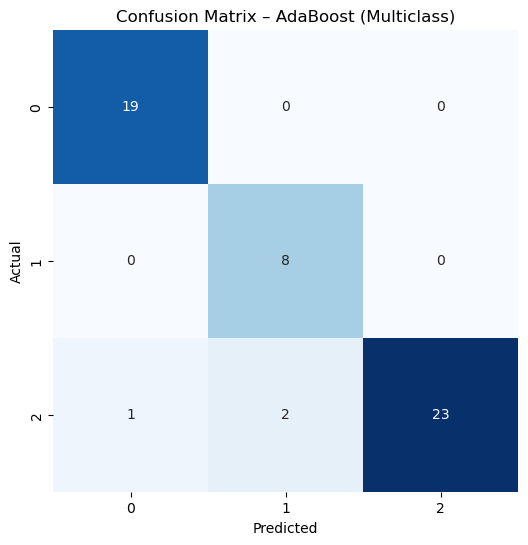

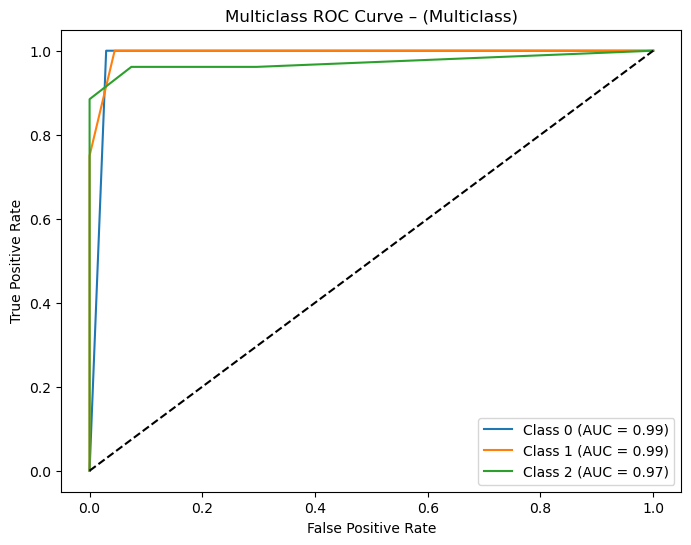

In [26]:
# ===================================
# PART 3: Multiclass Diabetes Dataset
# ===================================
from sklearn.preprocessing import label_binarize #for roc curve plotting use

# Define models (Sylhet-optimized)
models_data3 = {
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=5, min_samples_leaf=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42),
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1.0, max_iter=1000, random_state=42),
    "SVM": SVC(kernel='rbf', C=2.0, gamma='scale', probability=True, decision_function_shape='ovo', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance', metric='minkowski'),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam', alpha=0.0005, max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softprob', num_class=3, n_estimators=200, max_depth=5, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=150, learning_rate=0.05, random_state=42)
}


# Train and evaluate
for name, model in models_data3.items():
    print(f"\n--- {name} (Multiclass) ---")
    
    if name in scaled_models:
        model.fit(X3_train_scaled, y3_train)
        y_pred = model.predict(X3_test_scaled)
        y_prob = model.predict_proba(X3_test_scaled)
    else:
        model.fit(X3_train, y3_train)
        y_pred = model.predict(X3_test)
        y_prob = model.predict_proba(X3_test)

    print("Accuracy:", accuracy_score(y3_test, y_pred))
    print("Precision:", precision_score(y3_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y3_test, y_pred, average='weighted'))
    print("F1-score:", f1_score(y3_test, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y3_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y3_test, y_pred))
    print("AUC:", roc_auc_score(y3_test, y_prob, multi_class='ovr', average='weighted'))

     # Confusion matrix heatmap
    cm = confusion_matrix(y3_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix – {name} (Multiclass)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC curve
    classes = sorted(y3_test.unique())
    y_test_bin = label_binarize(y3_test, classes=classes)
    plt.figure(figsize=(8,6))
    for i, class_label in enumerate(classes):
        fpr, tpr, _ =roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc(fpr, tpr):.2f})")
        
    plt.plot([0,1], [0,1], 'k--')
    plt.title(f"Multiclass ROC Curve – (Multiclass)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

Accuracy: 0.7597402597402597
Precision: 0.7756804992760048
Recall: 0.7597402597402597
F1-score: 0.7638530159538564
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       100
           1       0.63      0.76      0.69        54

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.78      0.76      0.76       154

Confusion Matrix:
 [[76 24]
 [13 41]]
AUC: 0.8187037037037037


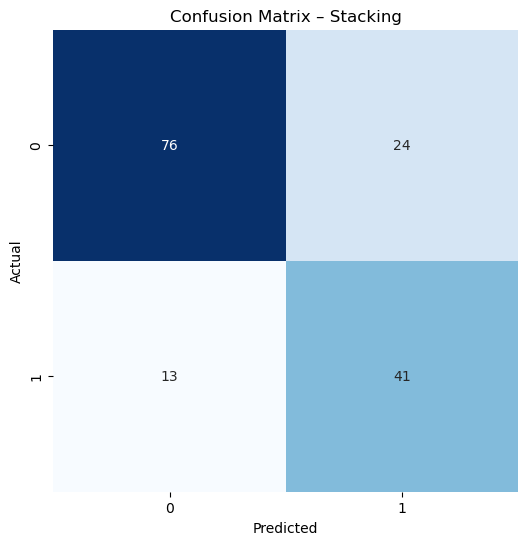

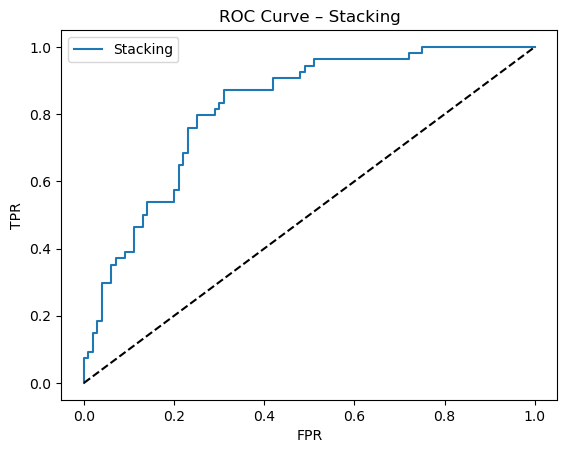

In [22]:
#Proposed Model (Stacking Models)
#First dataset
#Define the model
stacking_model = StackingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(n_estimators=300, max_depth=7, min_samples_split=5, min_samples_leaf=2, class_weight="balanced", random_state=42)),
        ("svm", SVC(kernel="rbf", C=2.0, gamma="scale", probability=True, class_weight="balanced", random_state=42)),
        ("ada", AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2, class_weight="balanced"), n_estimators=150, learning_rate=0.15, random_state=42))
    ],
    final_estimator=LogisticRegression(C=1.0, max_iter=2000, class_weight='balanced', random_state=42),
    stack_method="predict_proba",
    n_jobs=-1
)

#Fits the model
stacking_model.fit(X1_train_scaled, y1_train)
y_pred = stacking_model.predict(X1_test_scaled)
y_prob = stacking_model.predict_proba(X1_test_scaled)[:,1]

#Evaluation Result
print("Accuracy:", accuracy_score(y1_test, y_pred))
print("Precision:", precision_score(y1_test, y_pred, average="weighted"))
print("Recall:", recall_score(y1_test, y_pred, average="weighted"))
print("F1-score:", f1_score(y1_test, y_pred, average="weighted"))
print("Classification Report:\n", classification_report(y1_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y_pred))
print("AUC:", roc_auc_score(y1_test, y_prob))


#Visualization
cm = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Confusion Matrix – Stacking"); plt.show()
#ROC curve
fpr, tpr, _ = roc_curve(y1_test, y_prob)
plt.plot(fpr, tpr, label="Stacking")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curve – Stacking")
plt.legend()
plt.show()


Accuracy: 0.9904761904761905
Precision: 0.9906227106227107
Recall: 0.9904761904761905
F1-score: 0.9904543155189149
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        41
         1.0       0.98      1.00      0.99        64

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105

Confusion Matrix:
 [[40  1]
 [ 0 64]]
AUC: 0.9977134146341464


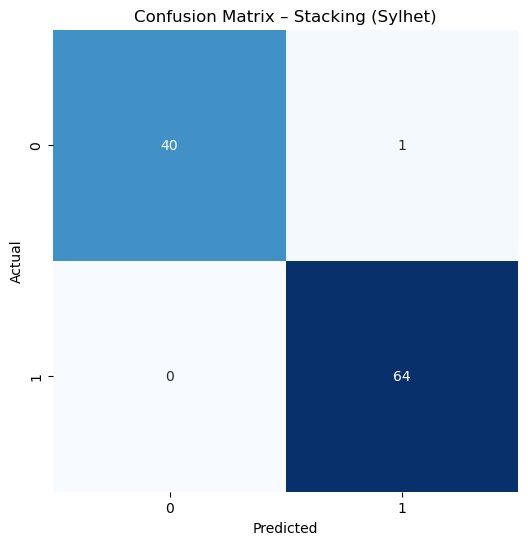

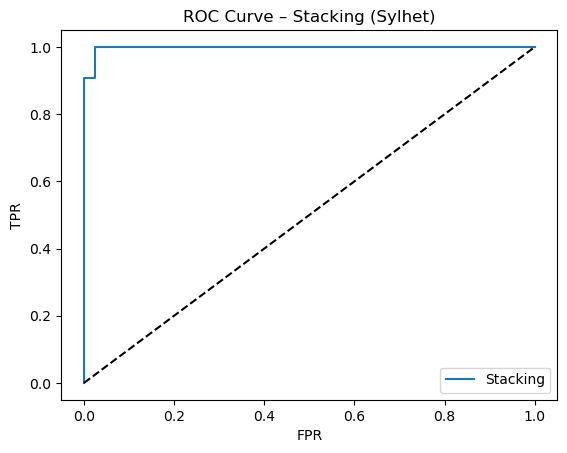

In [23]:
# Proposed Model (Stacking Models)
#Second dataset
stacking_model = StackingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=4, min_samples_leaf=2, class_weight="balanced", random_state=42)),
        ("svm", SVC(kernel="rbf", C=2.0, gamma="scale", probability=True, class_weight="balanced", random_state=42)),
        ("ada", AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2, class_weight="balanced"), n_estimators=200, learning_rate=0.2, random_state=42))
    ],
    final_estimator=LogisticRegression(C=1.0, max_iter=2000, class_weight="balanced", random_state=42),
    stack_method="predict_proba",
    n_jobs=-1
)

# Fit the model
stacking_model.fit(X2_train_scaled, y2_train)
y_pred = stacking_model.predict(X2_test_scaled)
y_prob = stacking_model.predict_proba(X2_test_scaled)[:,1]

# Evaluation result
print("Accuracy:", accuracy_score(y2_test, y_pred))
print("Precision:", precision_score(y2_test, y_pred, average="weighted"))
print("Recall:", recall_score(y2_test, y_pred, average="weighted"))
print("F1-score:", f1_score(y2_test, y_pred, average="weighted"))
print("Classification Report:\n", classification_report(y2_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y_pred))
print("AUC:", roc_auc_score(y2_test, y_prob))

# Visualization
cm = confusion_matrix(y2_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.title("Confusion Matrix – Stacking (Sylhet)")
plt.show()

fpr, tpr, _ = roc_curve(y2_test, y_prob)
plt.plot(fpr, tpr, label="Stacking")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curve – Stacking (Sylhet)")
plt.legend()
plt.show()


Accuracy: 0.9811320754716981
Precision: 0.9820754716981132
Recall: 0.9811320754716981
F1-score: 0.9811889922877712
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00         8
           2       1.00      0.96      0.98        26

    accuracy                           0.98        53
   macro avg       0.98      0.99      0.98        53
weighted avg       0.98      0.98      0.98        53

Confusion Matrix:
 [[19  0  0]
 [ 0  8  0]
 [ 1  0 25]]
AUC: 1.0


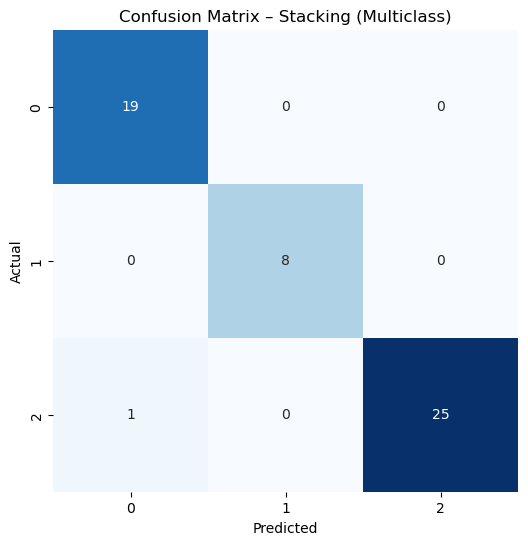

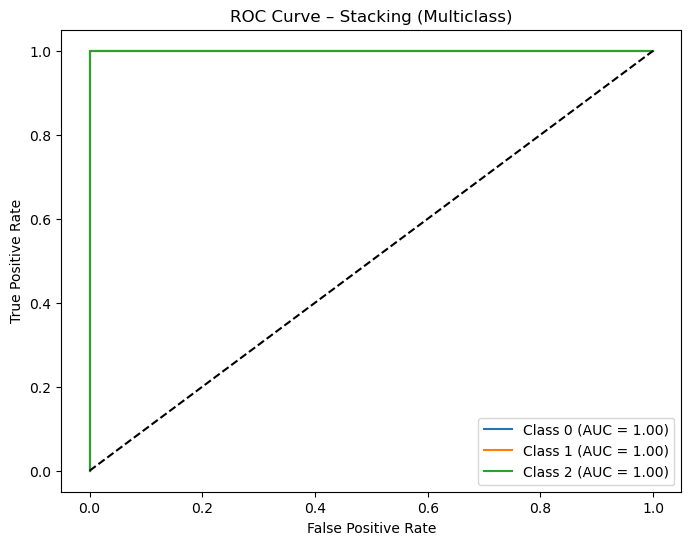

In [24]:
from sklearn.preprocessing import label_binarize

# Proposed Model (Stacking – Multiclass)
# Third dataset
stacking_model = StackingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)),
        ("svm", SVC(kernel="rbf", C=2.0, gamma="scale", probability=True, random_state=42)),
        ("ada", AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=200, learning_rate=0.1, random_state=42))
    ],
    final_estimator=RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42),
    stack_method="predict_proba",
    cv=5, #out-of-fold prediction
    n_jobs=-1
)

# Fit the model
stacking_model.fit(X3_train_scaled, y3_train)
y_pred = stacking_model.predict(X3_test_scaled)
y_prob = stacking_model.predict_proba(X3_test_scaled)

# Evaluation results
print("Accuracy:", accuracy_score(y3_test, y_pred))
print("Precision:", precision_score(y3_test, y_pred, average="weighted"))
print("Recall:", recall_score(y3_test, y_pred, average="weighted"))
print("F1-score:", f1_score(y3_test, y_pred, average="weighted"))
print("Classification Report:\n", classification_report(y3_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y3_test, y_pred))
print("AUC:", roc_auc_score(y3_test, y_prob, multi_class="ovr", average="weighted"))

# Confusion Matrix
cm = confusion_matrix(y3_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.title("Confusion Matrix – Stacking (Multiclass)")
plt.show()

# Multiclass ROC Curve
classes = sorted(y3_test.unique())
y_test_bin = label_binarize(y3_test, classes=classes)

plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Stacking (Multiclass)")
plt.legend()
plt.show()
